In [181]:
import pandas as pd
import numpy as np
import sklearn

## Ejercicio 1

In [182]:
data = pd.read_csv("data/data.csv")
X = pd.read_csv("data/X.csv")
y = pd.read_csv("data/y.csv")
seed = 1910

In [183]:
data.head()

,IMzq,NuAg,FpJw,vilF,AKmi,BDfC,pDDY,znPg,VNds,eCei,...,kcQL,OHJK,zbGt,XzTy,uauW,xbpG,Nozi,jRec,MngL,target
0,-6.774862,0.732090,0.500918,0.944929,-0.602723,1.032872,6.064671,-1.569083,-0.433074,-0.411138,...,3.875406,5.014296,0.302964,-0.719671,1.771007,-38.327154,-1.016544,-0.910132,-4.412012,0
1,3.857655,-0.612246,0.618588,0.459552,0.784440,-0.468198,0.651061,-4.741020,-0.552092,-5.488178,...,-3.830493,-3.467904,0.938938,-2.063109,0.179054,-11.194070,-5.197824,-0.286773,21.186963,1
2,-4.350896,0.654858,-0.424538,0.400425,-0.695568,0.954559,0.381870,1.490369,-1.097865,8.438625,...,2.430782,3.176884,1.521718,1.066505,-1.413488,10.341004,-4.757295,1.043693,-13.073736,0
3,-0.661896,-0.047801,0.025763,0.396485,-0.789812,-1.025823,2.003485,-2.794396,0.416429,3.011011,...,-3.220567,6.810913,1.641394,-0.715173,-0.041199,16.963959,-5.634772,1.736776,15.345755,0
4,1.596179,2.670130,0.961231,-0.337469,0.422516,-1.507684,3.563408,0.461990,-0.298087,-1.129244,...,0.721628,-1.546083,0.020279,1.458865,0.887693,15.078228,-3.548321,1.544351,6.419401,0


In [184]:
X.head()

,IMzq,NuAg,FpJw,vilF,AKmi,BDfC,pDDY,znPg,VNds,eCei,...,Vthd,kcQL,OHJK,zbGt,XzTy,uauW,xbpG,Nozi,jRec,MngL
0,-6.774862,0.732090,0.500918,0.944929,-0.602723,1.032872,6.064671,-1.569083,-0.433074,-0.411138,...,-0.459593,3.875406,5.014296,0.302964,-0.719671,1.771007,-38.327154,-1.016544,-0.910132,-4.412012
1,3.857655,-0.612246,0.618588,0.459552,0.784440,-0.468198,0.651061,-4.741020,-0.552092,-5.488178,...,-2.647234,-3.830493,-3.467904,0.938938,-2.063109,0.179054,-11.194070,-5.197824,-0.286773,21.186963
2,-4.350896,0.654858,-0.424538,0.400425,-0.695568,0.954559,0.381870,1.490369,-1.097865,8.438625,...,-0.004298,2.430782,3.176884,1.521718,1.066505,-1.413488,10.341004,-4.757295,1.043693,-13.073736
3,-0.661896,-0.047801,0.025763,0.396485,-0.789812,-1.025823,2.003485,-2.794396,0.416429,3.011011,...,-2.458483,-3.220567,6.810913,1.641394,-0.715173,-0.041199,16.963959,-5.634772,1.736776,15.345755
4,1.596179,2.670130,0.961231,-0.337469,0.422516,-1.507684,3.563408,0.461990,-0.298087,-1.129244,...,-0.343238,0.721628,-1.546083,0.020279,1.458865,0.887693,15.078228,-3.548321,1.544351,6.419401


In [185]:
y.head()

,target
0,0
1,1
2,0
3,0
4,0


In [186]:
X_dev = X.sample(frac=0.9, random_state=seed)
devIndexes = X_dev.index
testIndexes = X.index.difference(devIndexes)
y_dev = y.loc[X_dev.index]
X_test = X.loc[testIndexes]
y_test = y.loc[testIndexes]

#Chequeamos que la proporcion de casos positivos sea igual en train y test (no se si hace falta pero bueno lo vimos y da ok).
print(y_dev.iloc[:,0].sum()/len(y_dev))
print(y_test.iloc[:,0].sum()/len(y_test))

0.2577777777777778
0.24


## Ejercicio 2

In [187]:
from sklearn.tree import DecisionTreeClassifier
arbol = DecisionTreeClassifier(max_depth=3,random_state=seed)
arbol.fit(X_dev,y_dev)

DecisionTreeClassifier(max_depth=3, random_state=1910)

In [188]:
# Codigo auxiliar para calcular la curva ROC. Hacemos esto debido a que la funcion precision_recall_curve de sklearn solo evalua 
# cant_scores_distintos + 1 thresholds. La curva queda demasiado discretizada y no encontramos forma de aumentar la cantidad de thresholds.

from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr(y_true, y_scores, threshold):
    y_pred = (y_scores >= threshold).astype(int)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() # Convierte arreglo multidimensional a unidimensional.
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tpr
    
    return tpr, fpr, precision, recall

# Nos dimos cuenta que esto no era necesario, si tenemos muchos tresholds igualmente al tener pocos scores distintos todos los tresholds que caigan entre
# 2 posibles scores van a dar lo mismo.


[0.71111111 0.73333333 0.75555556 0.73333333 0.76666667]
[0.82777778 0.84722222 0.85555556 0.86666667 0.85277778]


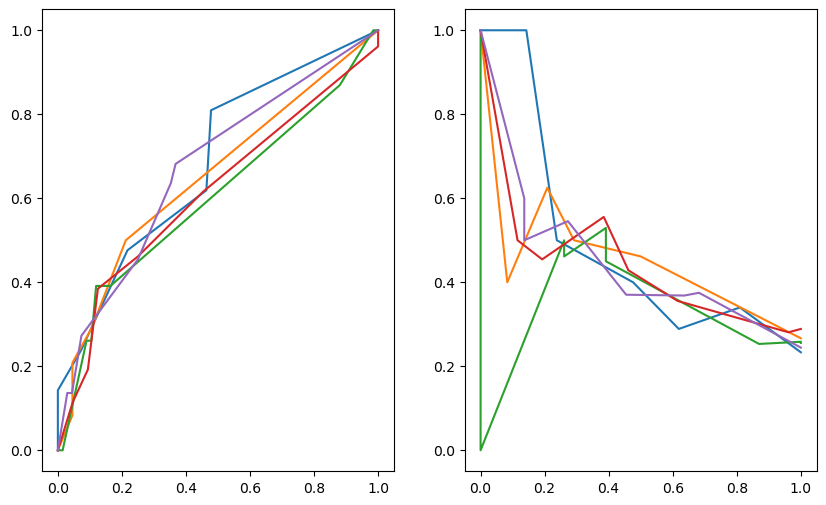

In [189]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

kf = KFold(n_splits=5)
y_pred = np.empty(y_dev.shape[0])
y_pred.fill(np.nan)

y_pred_probas = y_pred.copy()

vec = np.array([np.nan]*5)

accuracies_val = vec.copy()
accuracies_train = vec.copy()

auprc_train = vec.copy()
auprc_val = vec.copy()

aucroc_train = vec.copy()
aucroc_val = vec.copy()

thresholds = np.linspace(0, 1, 50)

i = 0
plt.figure(figsize=(10, 6))
for train_index, val_index in kf.split(X_dev):
    kf_X_train, kf_X_val = X_dev.iloc[train_index,:], X_dev.iloc[val_index,:]
    kf_y_train, kf_y_val = y_dev.iloc[train_index,:], y_dev.iloc[val_index,:]

    kf_arbol = DecisionTreeClassifier(**{"max_depth":3}, random_state=seed)
    kf_arbol.fit(kf_X_train, kf_y_train)
    
    # Prediccion en {0,1}.
    kf_predictions_val = kf_arbol.predict(kf_X_val)
    kf_predictions_train = kf_arbol.predict(kf_X_train)

    # Score.
    kf_predictions_proba_val = kf_arbol.predict_proba(kf_X_val)[:, 1] 
    kf_predictions_proba_train = kf_arbol.predict_proba(kf_X_train)[:, 1] 

    y_pred[val_index] = kf_predictions_val
    y_pred_probas[val_index] = kf_predictions_proba_val

    accuracies_val[i] = sum(np.array(kf_predictions_val)==np.array(kf_y_val.iloc[:,0]))/len(kf_predictions_val)
    accuracies_train[i] = sum(np.array(kf_predictions_train)==np.array(kf_y_train.iloc[:,0]))/len(kf_predictions_train)

    precision_val, recall_val, threshold_val = precision_recall_curve(kf_y_val, kf_predictions_proba_val)
    precision_train, recall_train, threshold_train = precision_recall_curve(kf_y_train, kf_predictions_proba_train)

    """metrics = {
        'train': {'tpr': [], 'fpr': [], 'precision': [], 'recall': []},
        'val': {'tpr': [], 'fpr': [], 'precision': [], 'recall': []}
    }
    for threshold in thresholds:
        tpr_train_t, fpr_train_t, precision_train_t, recall_train_t = calculate_tpr_fpr(kf_y_train, kf_predictions_proba_train, threshold)
        tpr_val_t, fpr_val_t, precision_val_t, recall_val_t = calculate_tpr_fpr(kf_y_val, kf_predictions_proba_val, threshold)
        metrics['train']['tpr'].append(tpr_train_t)
        metrics['train']['fpr'].append(fpr_train_t)
        metrics['train']['precision'].append(precision_train_t)
        metrics['train']['recall'].append(recall_train_t)
        metrics['val']['tpr'].append(tpr_val_t)
        metrics['val']['fpr'].append(fpr_val_t)
        metrics['val']['precision'].append(precision_val_t)
        metrics['val']['recall'].append(recall_val_t)"""

    auprc_train[i] = auc(recall_train, precision_train)
    auprc_val[i] = auc(recall_val, precision_val)

    fpr_val, tpr_val, threshold_aucroc_val = roc_curve(kf_y_val, kf_predictions_proba_val)
    fpr_train, tpr_train, threshold_aucroc_train = roc_curve(kf_y_train, kf_predictions_proba_train)

    aucroc_val[i] = auc(fpr_val, tpr_val)
    aucroc_train[i] = auc(fpr_train, tpr_train)

    plt.subplot(1, 2, 1)
    plt.plot(fpr_val, tpr_val)

    plt.subplot(1, 2, 2)
    plt.plot(recall_val, precision_val)

    # Suponiendo que ya tienes el árbol entrenado en kf_arbol
    class_names = [str(cls) for cls in kf_arbol.classes_]

    """plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura según sea necesario
    plot_tree(kf_arbol, filled=True, feature_names=X_dev.columns, class_names=class_names)
    plt.show()
"""
    i = i+1

#Tengo en la posición i-ésima la predicción que obtuve para la observación i-ésima cuando esta estuvo en el fold de test (esto solo pasa en una iteración, no se sobreescribe)
print(accuracies_val)
print(accuracies_train)

accuracy_global = sum(y_pred == y_dev.target.to_list()) / len(y_pred)

precision_val_global, recall_val_global, _ = precision_recall_curve(y_dev, y_pred_probas)
fpr_val_global, tpr_val_global, _ = roc_curve(y_dev, y_pred_probas)

auprc_global = auc(recall_val_global, precision_val_global)
aucroc_global = auc(fpr_val_global, tpr_val_global)

In [190]:
df = pd.DataFrame()

df['Permutacion'] = [1,2,3,4,5,'Promedios','Global']
df['Accuracy (training)'] = list(accuracies_train) + [np.array(accuracies_train).mean()] + ['(NO)']
df['Accuracy (validation)'] = list(accuracies_val) + [np.array(accuracies_val).mean()] + [accuracy_global]
df['AUPRC (training)'] = list(auprc_train) + [np.array(auprc_train).mean()] + ['(NO)']
df['AUPRC (validation)'] = list(auprc_val) + [np.array(auprc_val).mean()] + [auprc_global]
df['AUCROC (training)'] = list(aucroc_train) + [np.array(aucroc_train).mean()] + ['(NO)']
df['AUCROC (validation)'] = list(aucroc_val) + [np.array(aucroc_val).mean()] + [aucroc_global]

df

,Permutacion,Accuracy (training),Accuracy (validation),AUPRC (training),AUPRC (validation),AUCROC (training),AUCROC (validation)
0,1,0.827778,0.711111,0.710734,0.485132,0.797378,0.682885
1,2,0.847222,0.733333,0.705731,0.451482,0.770786,0.649937
2,3,0.855556,0.755556,0.758134,0.331357,0.815895,0.600260
3,4,0.866667,0.733333,0.744012,0.439658,0.850473,0.612380
4,5,0.852778,0.766667,0.735426,0.446235,0.826428,0.671791
5,Promedios,0.85,0.740000,0.730807,0.430773,0.812192,0.643450
6,Global,(NO),0.740000,(NO),0.421786,(NO),0.645790


In [191]:
parametros = [(3, 'gini'), (5, 'gini'), (None, 'gini'), (3, 'entropy'), (5, 'entropy'),(None, 'entropy')]

accuracies_train_means = np.array([])
accuracies_val_means = np.array([])

for max_depth, criterion in parametros:
    kf = KFold(n_splits=5)
    y_pred = np.empty(y_dev.shape[0])
    y_pred.fill(np.nan)

    y_pred_probas = y_pred.copy()

    accuracies_val = np.array([])
    accuracies_train = np.array([])

    for train_index, val_index in kf.split(X_dev):
        kf_X_train, kf_X_val = X_dev.iloc[train_index,:], X_dev.iloc[val_index,:]
        kf_y_train, kf_y_val = y_dev.iloc[train_index,:], y_dev.iloc[val_index,:]

        kf_arbol = DecisionTreeClassifier(**{"max_depth":max_depth, "criterion": criterion},random_state=seed)
        kf_arbol.fit(kf_X_train, kf_y_train)

        kf_predictions_val = kf_arbol.predict(kf_X_val)
        kf_predictions_train = kf_arbol.predict(kf_X_train)

        y_pred[val_index] = kf_predictions_val
        y_pred_probas[val_index] = kf_predictions_proba_val

        accuracies_val = np.append(accuracies_val, (sum(np.array(kf_predictions_val)==np.array(kf_y_val.iloc[:,0]))/len(kf_predictions_val)))
        accuracies_train = np.append(accuracies_train, sum(np.array(kf_predictions_train)==np.array(kf_y_train.iloc[:,0]))/len(kf_predictions_train))

    accuracies_train_means = np.append(accuracies_train_means, accuracies_train.mean())
    accuracies_val_means = np.append(accuracies_val_means, accuracies_val.mean())
    
        

In [192]:
df = pd.DataFrame()

df['Altura maxima'] = ['Infinito' if pd.isna(tupla[0]) else tupla[0] for tupla in parametros]
df['Criterio de corte'] = [tupla[1] for tupla in parametros]
df['Accuracy (training)'] = accuracies_train_means
df['Accuracy (validacion)'] = accuracies_val_means

df

,Altura maxima,Criterio de corte,Accuracy (training),Accuracy (validacion)
0,3,gini,0.850000,0.740000
1,5,gini,0.938889,0.735556
2,Infinito,gini,1.000000,0.704444
3,3,entropy,0.820556,0.748889
4,5,entropy,0.917778,0.682222
5,Infinito,entropy,1.000000,0.671111


In [193]:
vec = np.array([np.nan]*5)
vec

array([nan, nan, nan, nan, nan])

In [194]:
accuracies_val.mean()

0.671111111111111

# Ejercicio 3

## 3.1

### Arboles de Decision

In [195]:
import random 
random.seed(42)

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 

parametros = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': list(range(100, 250)),
    'max_leaf_nodes':  list(range(2, 16)), # Los arboles que se suelen crear tienen entre altura 2 y altura 4.
    'min_samples_leaf': list(range(10, 100))
}
tree = DecisionTreeClassifier(random_state=seed)
clf = RandomizedSearchCV(tree, parametros, cv=5, n_iter=200, scoring='roc_auc', random_state=seed)

search = clf.fit(X_dev, y_dev)


results_tree = pd.DataFrame(search.cv_results_)
print(search.best_params_)
print(search.best_score_)

top3 = results_tree[results_tree['rank_test_score'].isin(results_tree.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3

{'min_samples_split': 146, 'min_samples_leaf': 69, 'max_leaf_nodes': 12, 'criterion': 'entropy'}
0.7258472132093157


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
44,0.030980,0.003096,0.013193,0.001599,146,69,12,entropy,"{'min_samples_split': 146, 'min_samples_leaf':...",0.819273,0.728748,0.692083,0.625243,0.763889,0.725847,0.065491,1
55,0.037977,0.004144,0.017989,0.004146,131,69,15,log_loss,"{'min_samples_split': 131, 'min_samples_leaf':...",0.819273,0.728748,0.692083,0.625243,0.763889,0.725847,0.065491,1
104,0.030381,0.002058,0.020388,0.015973,111,66,5,entropy,"{'min_samples_split': 111, 'min_samples_leaf':...",0.819273,0.728748,0.692083,0.625243,0.753472,0.723764,0.064404,5
111,0.029183,0.000747,0.012396,0.001503,108,68,14,log_loss,"{'min_samples_split': 108, 'min_samples_leaf':...",0.819273,0.728748,0.692083,0.625243,0.763889,0.725847,0.065491,1
126,0.030581,0.002938,0.012792,0.001165,108,75,4,entropy,"{'min_samples_split': 108, 'min_samples_leaf':...",0.819273,0.717067,0.692083,0.634004,0.763889,0.725263,0.062970,4


### KNN

In [197]:
from sklearn.neighbors import KNeighborsClassifier

parametros = {
    'n_neighbors': list(range(1,50)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['cityblock', 'euclidean', 'manhattan']
}
neigh = KNeighborsClassifier()
clf = RandomizedSearchCV(neigh, parametros, cv=5, n_iter=200, scoring='roc_auc', random_state=seed)

search = clf.fit(X_dev, y_dev.values.ravel())

results_neigh = pd.DataFrame(search.cv_results_)
print(search.best_params_)
print(search.best_score_)

top3 = results_neigh[results_neigh['rank_test_score'].isin(results_neigh.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3

{'weights': 'distance', 'n_neighbors': 27, 'metric': 'cityblock', 'algorithm': 'kd_tree'}
0.8611102917559764


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
60,0.017290,0.000979,0.020693,0.001439,distance,23,manhattan,kd_tree,"{'weights': 'distance', 'n_neighbors': 23, 'me...",0.936405,0.830629,0.761843,0.872810,0.897727,0.859883,0.059871,4
79,0.006995,0.000001,0.061562,0.002244,distance,24,cityblock,brute,"{'weights': 'distance', 'n_neighbors': 24, 'me...",0.935756,0.826087,0.767034,0.876703,0.896465,0.860409,0.058548,2
133,0.016391,0.001019,0.019188,0.000979,distance,24,manhattan,kd_tree,"{'weights': 'distance', 'n_neighbors': 24, 'me...",0.935756,0.826087,0.767034,0.876703,0.896465,0.860409,0.058548,2
155,0.018193,0.000973,0.020995,0.001050,distance,27,cityblock,kd_tree,"{'weights': 'distance', 'n_neighbors': 27, 'me...",0.946139,0.828683,0.761843,0.858533,0.910354,0.861110,0.064136,1


### SVM

In [198]:
from sklearn.svm import SVC

parametros = {
    'C': list(range(1, 20)),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}
svc = SVC()
clf = RandomizedSearchCV(svc, parametros, cv=5, n_iter=200, scoring='roc_auc', random_state=seed)

search = clf.fit(X_dev, y_dev.values.ravel())

results_svc = pd.DataFrame(search.cv_results_)
print(search.best_params_)
print(search.best_score_)

top3 = results_svc[results_svc['rank_test_score'].isin(results_svc.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3

{'kernel': 'rbf', 'gamma': 0.0001, 'C': 14}
0.9105434618737668


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.059063,0.036389,0.024868,0.00952,rbf,0.0001,14,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 14}",0.953277,0.935107,0.820896,0.883842,0.959596,0.910543,0.052126,1
114,0.023398,0.001016,0.012191,0.00075,rbf,0.0001,18,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 18}",0.959766,0.935756,0.809864,0.887735,0.957071,0.910038,0.056354,3
169,0.023586,0.001199,0.011193,0.00040,rbf,0.0001,13,"{'kernel': 'rbf', 'gamma': 0.0001, 'C': 13}",0.951979,0.932511,0.823491,0.882544,0.961490,0.910403,0.051297,2


## 3.2

In [199]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

clf = LinearDiscriminantAnalysis()

roc_auc_scorer = make_scorer(roc_auc_score)

scores = cross_val_score(clf, X_dev, y_dev.values.ravel(), cv=5, scoring=roc_auc_scorer)

scores.mean()

0.6301897134878965

In [200]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

scores = cross_val_score(clf, X_dev, y_dev.values.ravel(), cv=5, scoring=roc_auc_scorer)

scores.mean()

0.6807941517707903

# Ejercicio 4

Graficar curvas de complejidad para cada modelo, variando la profundidad en el caso de árboles.

In [201]:
top3 = results_tree[results_tree['rank_test_score'].isin(results_tree.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3 = top3.drop_duplicates(subset='rank_test_score', keep='first').sort_values('rank_test_score')
auc_splits_v = np.zeros((3, 5, 9))
auc_splits_tr = np.zeros((3, 5, 9))


split_i = 0
for train_index, val_index in kf.split(X_dev):
    top_i = 0
    for fila in range(3):
        for depth in range(9):
            dict = top3.iloc[fila].params
            dict['max_depth'] = depth +1
            tree = DecisionTreeClassifier(**dict, random_state=seed)

            test = y_dev.iloc[train_index,:]
            tree.fit(X_dev.iloc[train_index,:], test)

            y_score_v = tree.predict_proba(X_dev.iloc[val_index,:])

            auc_score_v = roc_auc_score(y_dev.iloc[val_index,:], y_score_v[:,1])

            y_score_tr = tree.predict_proba(X_dev.iloc[train_index,:])
            auc_score_tr = roc_auc_score(y_dev.iloc[train_index,:], y_score_tr[:,1])

            auc_splits_v[top_i][split_i][depth] = auc_score_v

            auc_splits_tr[top_i][split_i][depth] = auc_score_tr

        top_i += 1
    split_i += 1


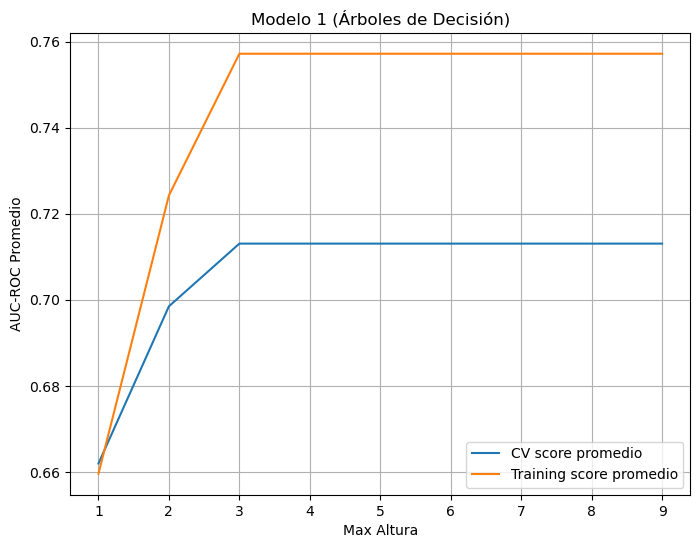

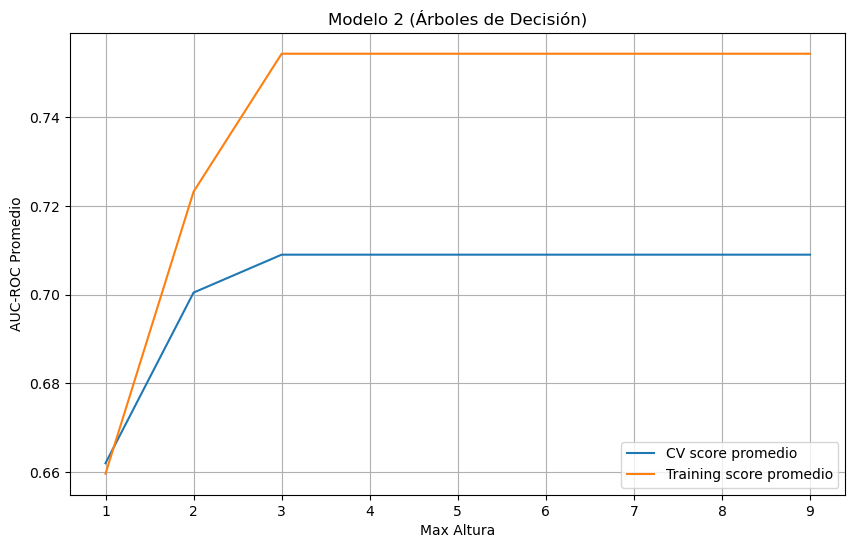

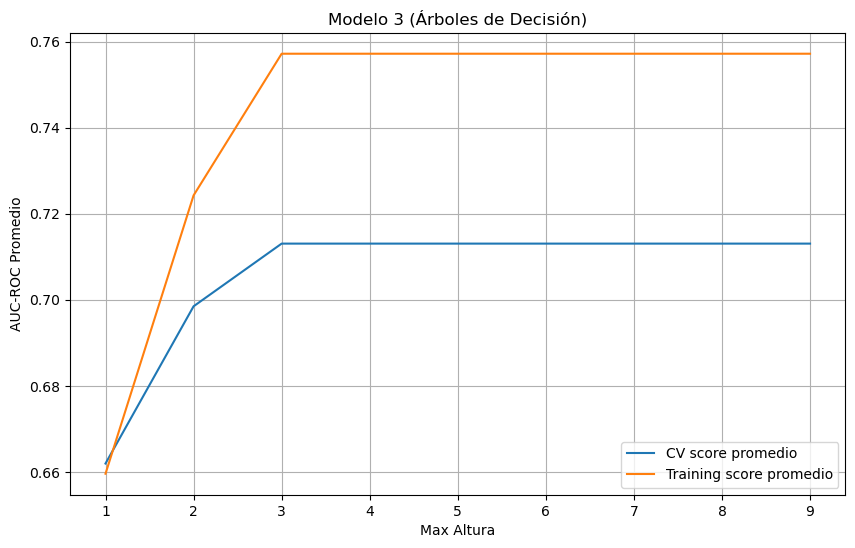

In [202]:
aucroc_promedio_por_altura_v = np.mean(auc_splits_v, axis=1) # 3 filas con 9 columnas, cada una representa el promedio de la altura sobre todos los splits.

aucroc_promedio_por_altura_tr = np.mean(auc_splits_tr, axis=1)

max_altura = np.arange(1, 10)

plt.figure(figsize=(8, 6))

for model_idx in range(aucroc_promedio_por_altura_v.shape[0]): # Iteramos sobre el top3 de modelos.
    plt.plot(max_altura, aucroc_promedio_por_altura_v[model_idx, :], label="CV score promedio")
    plt.plot(max_altura, aucroc_promedio_por_altura_tr[model_idx, :], label="Training score promedio")

    plt.xlabel('Max Altura')
    plt.ylabel('AUC-ROC Promedio')
    plt.title(f'Modelo {model_idx + 1} (Árboles de Decisión)')
    plt.legend()
    plt.grid(True)

    plt.show()


Graficar curvas de complejidad para cada modelo, variando el hiperparámetro C en el caso de SVM.

In [203]:
top3 = results_svc[results_svc['rank_test_score'].isin(results_svc.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3 = top3.drop_duplicates(subset='rank_test_score', keep='first').sort_values('rank_test_score')

max_C = 20

auc_splits_v = np.zeros((3, 5, max_C))
auc_splits_tr = np.zeros((3, 5, max_C))


split_i = 0
for train_index, val_index in kf.split(X_dev):
    top_i = 0
    for fila in range(3):
        for C in range(max_C):
            dict = top3.iloc[fila].params
            dict['C'] = C +1
            svc = SVC(**dict, probability=True, random_state=seed)

            test = y_dev.iloc[train_index,:]
            svc.fit(X_dev.iloc[train_index,:], test)

            y_score_v = svc.predict_proba(X_dev.iloc[val_index,:])

            auc_score_v = roc_auc_score(y_dev.iloc[val_index,:], y_score_v[:,1])

            y_score_tr = svc.predict_proba(X_dev.iloc[train_index,:])
            auc_score_tr = roc_auc_score(y_dev.iloc[train_index,:], y_score_tr[:,1])

            auc_splits_v[top_i][split_i][C] = auc_score_v

            auc_splits_tr[top_i][split_i][C] = auc_score_tr

        top_i += 1
    split_i += 1


c:\Users\Cataje\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Cataje\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Cataje\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Cataje\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

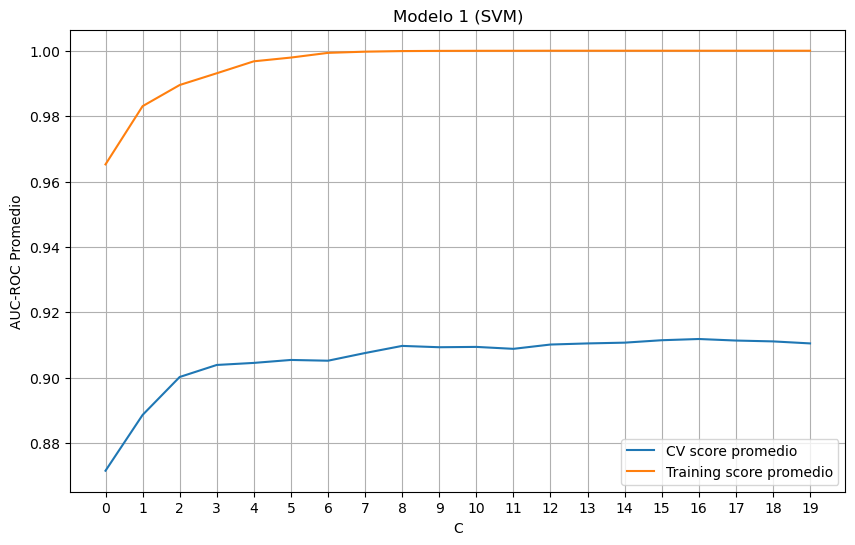

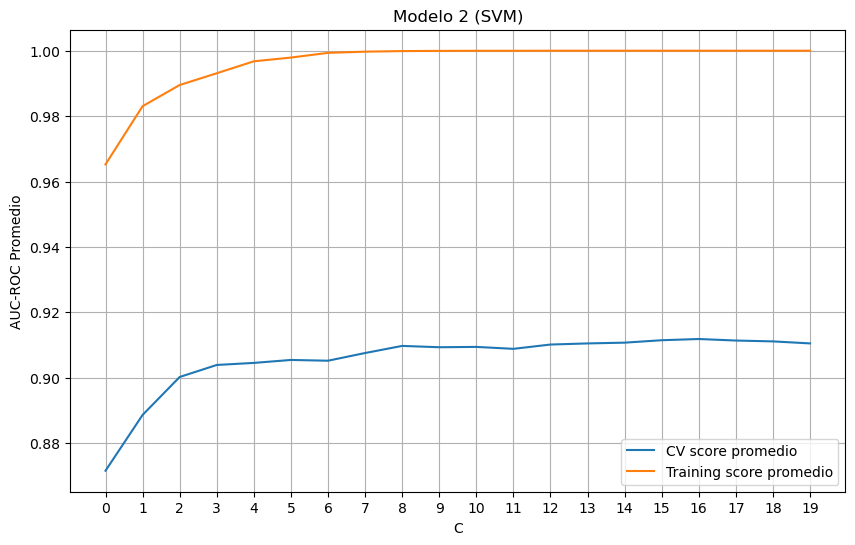

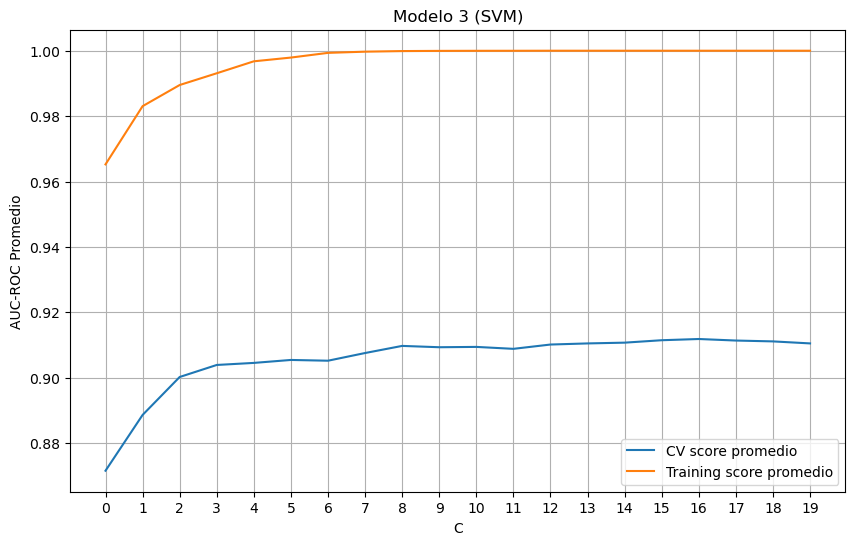

In [204]:
plt.rcParams['figure.figsize'] = [10, 6]

aucroc_promedio_por_altura_v = np.mean(auc_splits_v, axis=1) # 3 filas con 9 columnas, cada una representa el promedio de la altura sobre todos los splits.

aucroc_promedio_por_altura_tr = np.mean(auc_splits_tr, axis=1)

C = np.arange(20)

for model_idx in range(aucroc_promedio_por_altura_v.shape[0]): # Iteramos sobre el top3 de modelos.
    plt.plot(C, aucroc_promedio_por_altura_v[model_idx, :], label="CV score promedio")
    plt.plot(C, aucroc_promedio_por_altura_tr[model_idx, :], label="Training score promedio")

    plt.xlabel('C')
    plt.ylabel('AUC-ROC Promedio')
    plt.title(f'Modelo {model_idx + 1} (SVM)')
    plt.legend()
    plt.grid(True)
    plt.xticks(C)

    plt.show()


Graficar curvas de aprendizaje para cada modelo pero ahora incluya LDA.

Curvas de complejidad para Arboles de Decision.

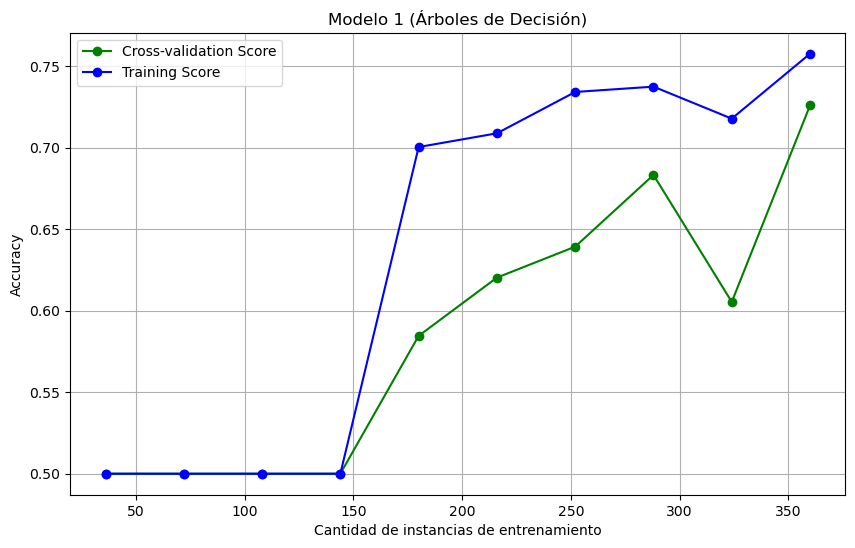

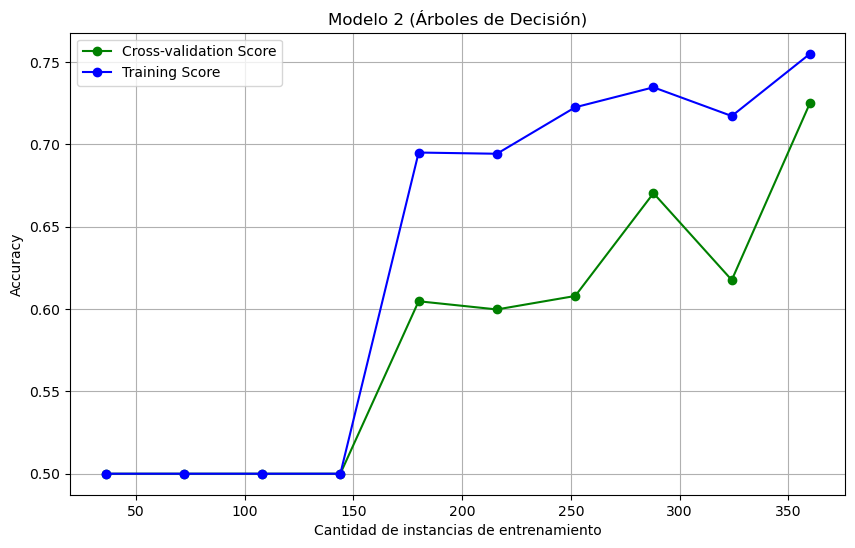

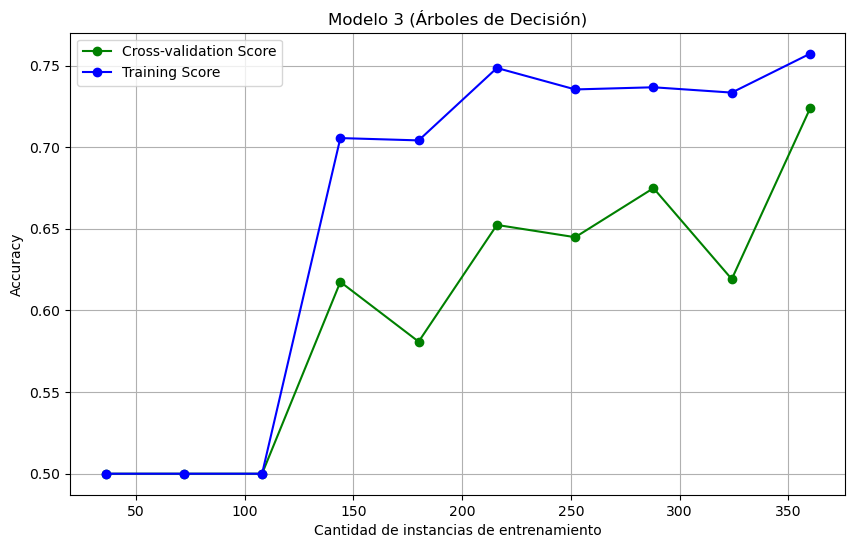

In [205]:
from sklearn.model_selection import learning_curve

top3 = results_tree[results_tree['rank_test_score'].isin(results_tree.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3 = top3.drop_duplicates(subset='rank_test_score', keep='first').sort_values('rank_test_score')
auc_splits_v = np.zeros((3, 5, 9))
auc_splits_tr = np.zeros((3, 5, 9))

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
split_i = 0
for fila in range(3):
    dict = top3.iloc[fila].params
    tree = DecisionTreeClassifier(**dict, random_state=seed)

    train_sizes, train_scores, test_scores = learning_curve(tree, X_dev, y_dev.values.ravel(), cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring=roc_auc_scorer)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f'Modelo {fila + 1} (Árboles de Decisión)')
    plt.xlabel("Cantidad de instancias de entrenamiento")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.legend()


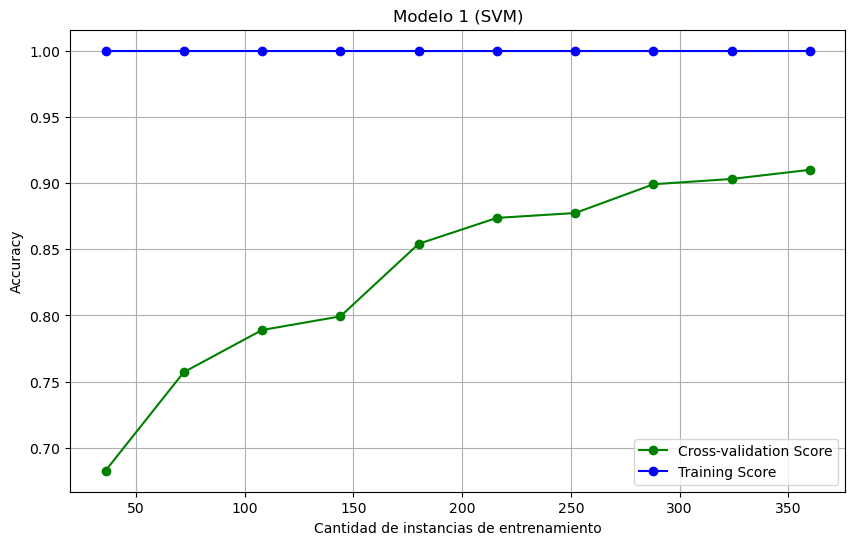

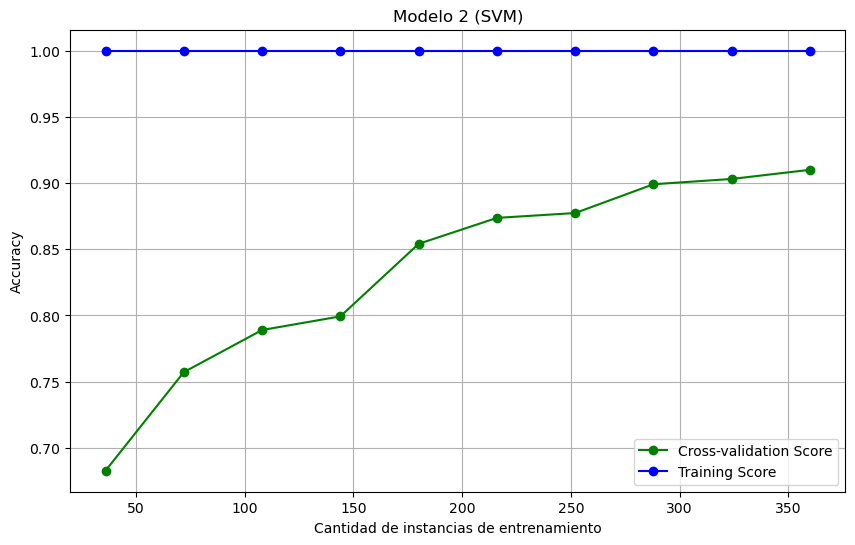

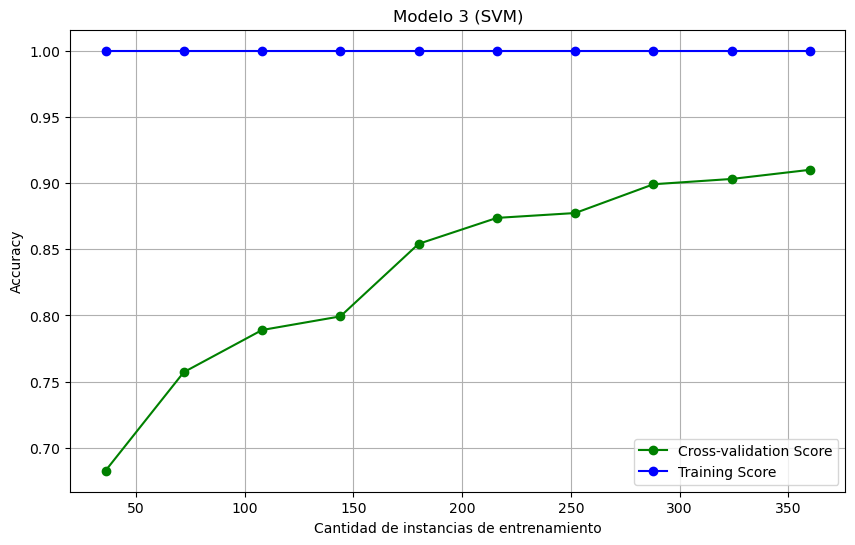

In [206]:
from sklearn.model_selection import learning_curve

top3 = results_svc[results_svc['rank_test_score'].isin(results_svc.sort_values('rank_test_score').rank_test_score.unique()[:3])]
top3 = top3.drop_duplicates(subset='rank_test_score', keep='first').sort_values('rank_test_score')

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
split_i = 0
for fila in range(3):
    dict = top3.iloc[fila].params
    svc = SVC(**dict, probability=True, random_state=seed)

    train_sizes, train_scores, test_scores = learning_curve(svc, X_dev, y_dev.values.ravel(), cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring=roc_auc_scorer)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(f'Modelo {fila + 1} (SVM)')
    plt.xlabel("Cantidad de instancias de entrenamiento")
    plt.ylabel("Accuracy")
    plt.grid()

    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")
    plt.legend()


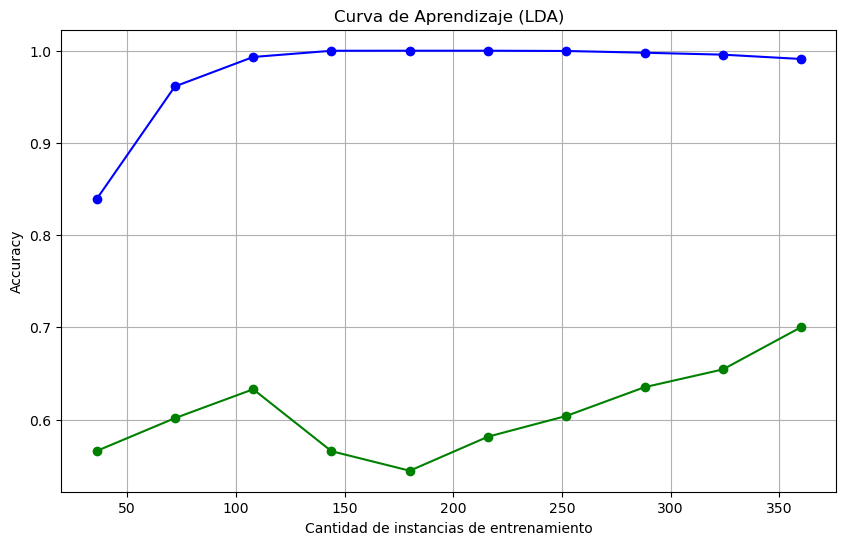

In [207]:
from sklearn.model_selection import learning_curve

lda = LinearDiscriminantAnalysis()

train_sizes, train_scores, test_scores = learning_curve(lda, X_dev, y_dev.values.ravel(), cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring=roc_auc_scorer)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje (LDA)")
plt.xlabel("Cantidad de instancias de entrenamiento")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")

Construir un modelo RandomForest con 200 árboles. Explorar para qué sirve el hiperparámetro max_features y cómo afecta a la performance del algoritmo mediante una curva de complejidad.

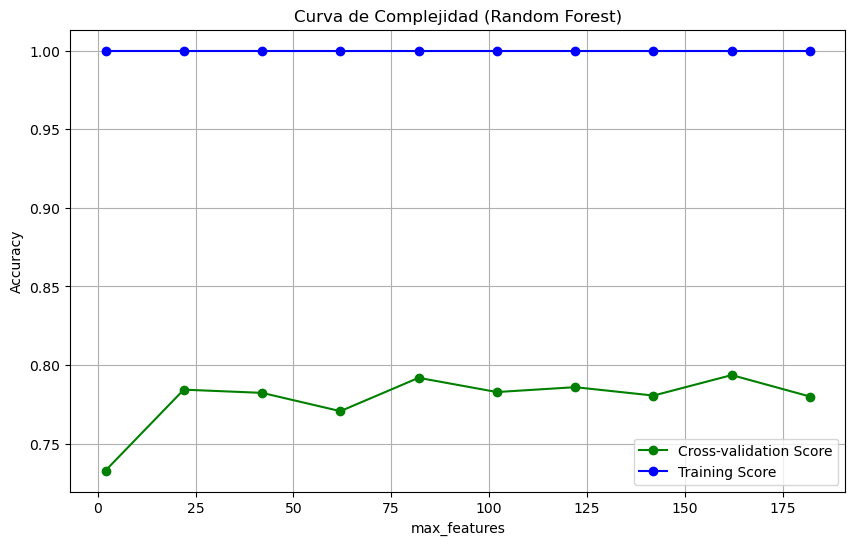

In [208]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=200, random_state=seed)

param_range = np.arange(2, 200, 20)
train_scores, test_scores = validation_curve(clf, X_dev, y_dev.values.ravel(), cv=5, param_name='max_features', param_range=param_range,scoring=roc_auc_scorer)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Complejidad (Random Forest)")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.plot(param_range, train_scores_mean, 'o-', color="b", label="Training Score")
plt.legend()

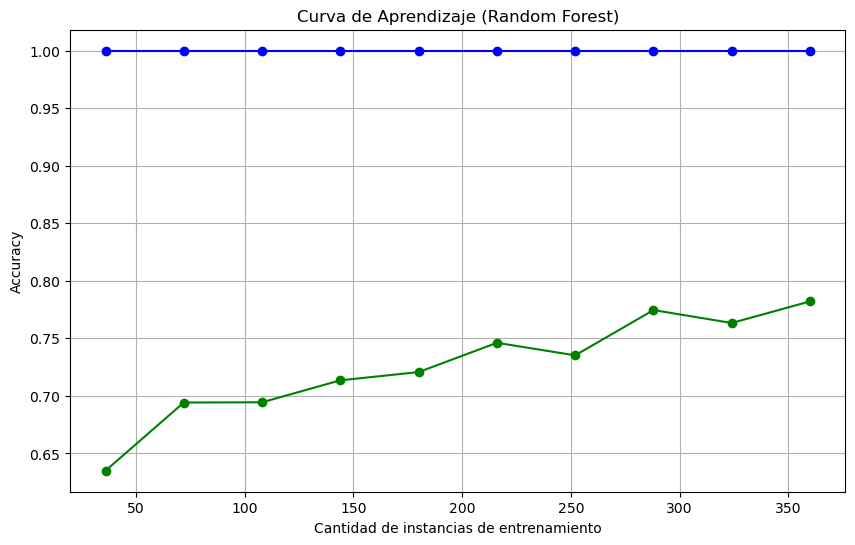

In [209]:
clf = RandomForestClassifier(n_estimators=200, random_state=seed)
train_sizes, train_scores, test_scores = learning_curve(clf, X_dev, y_dev.values.ravel(), cv=5, train_sizes=np.linspace(0.1, 1, 10), scoring=roc_auc_scorer)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de Aprendizaje (Random Forest)")
plt.xlabel("Cantidad de instancias de entrenamiento")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training Score")

# Ejercicio 5

Elegimos SVM porque es el modelo que mejor anduvo.

In [210]:
modelo_optimo = SVC(**{'kernel': 'rbf', 'gamma': 0.0001, 'C': 14}, probability = True, random_state = seed)
modelo_optimo.fit(X_dev, y_dev)

y_score = modelo_optimo.predict_proba(X_test)
auc_score = roc_auc_score(y_test, y_score[:,1])
print(auc_score)

0.9407894736842106


c:\Users\Cataje\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Parece que la rompimos.

In [211]:
X_held_out = pd.read_csv("X_held_out.csv")
probas_held_out = np.round(modelo_optimo.predict_proba(X_held_out), 4)
#En la segunda columna tenemos la probabilidad de pertenecer a la clase positiva.
probas_held_out
sum(probas_held_out[:,1] >= probas_held_out[:,0])/(len(probas_held_out))


0.212

In [212]:
df_probas_held_out = pd.DataFrame(probas_held_out[:,1])
df_probas_held_out.to_csv("02_y_pred_held_out_9408.csv")
df_probas_held_out

,0
0,0.1042
1,0.2767
2,0.3522
3,0.0832
4,0.0334
...,...
245,0.4270
246,0.6437
247,0.0793
248,0.4769
